## Overview

In this project, I will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been used containing records of bike rentals in Seoul, collected during 2017-18.

In [1]:
# Python ≥3.5 is required
import sys
import sklearn
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns

## Step 1: Loading and initial processing of the dataset

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data


In [2]:
### Your code here
df= pd.read_csv("SeoulBikeData.csv")

# Changing numbers to numeric to perform vizualization
for i in ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    df[i]=pd.to_numeric(df[i], errors='coerce')
df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8739.000000,8739.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813,0.569017,0.149045,0.086486
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369,0.869311,1.129524,1.145001
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000


In [8]:
df.loc[0,'Hour']='a0000001'

In [13]:
df['Hour']=df['Hour'].astype('string')
df['Hour'].str.replace(r'[A-Za-z]','')

C:\Users\dhari\AppData\Local\Temp\ipykernel_2680\2186765274.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Hour'].str.replace(r'[A-Za-z]','')


0       0000001
1             1
2             2
3             3
4             4
         ...   
8755         19
8756         20
8757         21
8758         22
8759         23
Name: Hour, Length: 8760, dtype: string

### Vizualizing each column with box plot

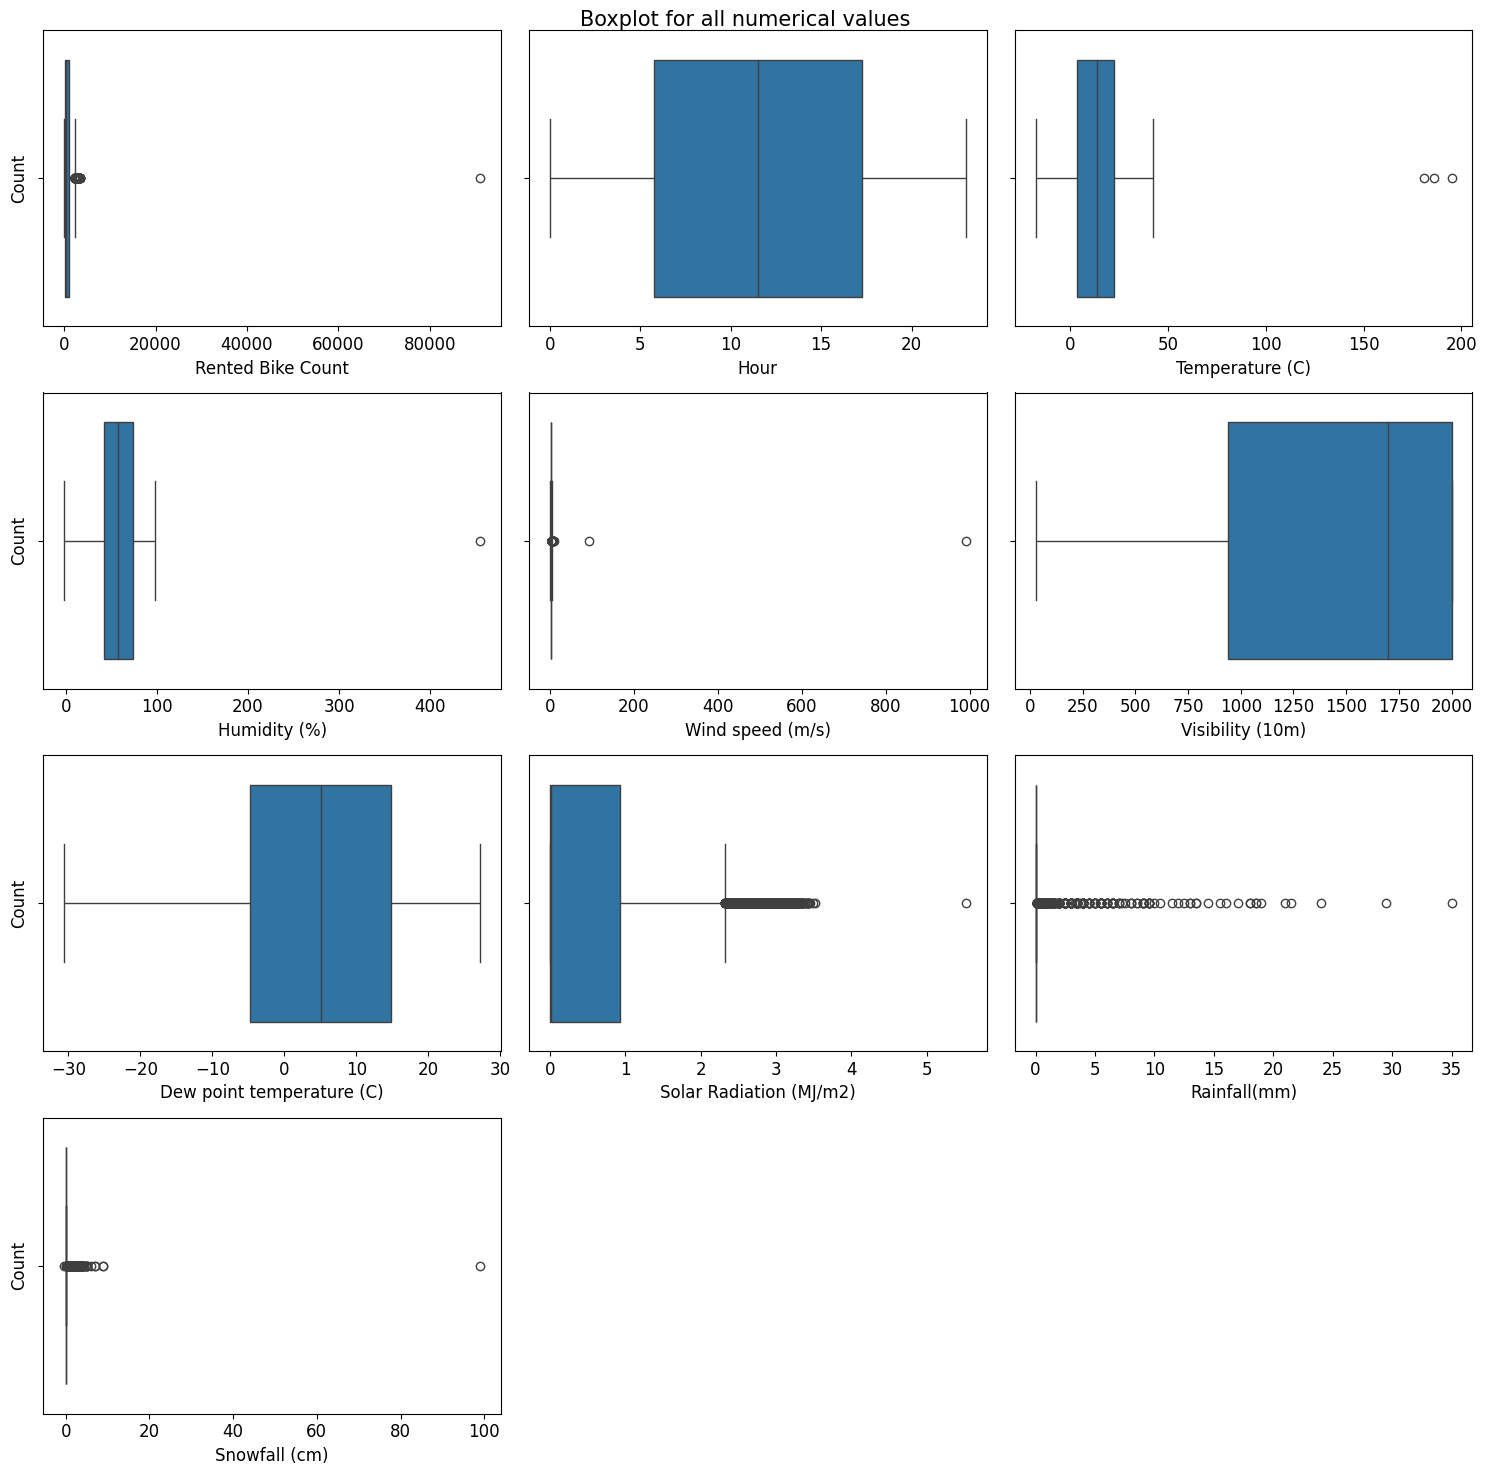

In [3]:
fig, axs= plt.subplots(4,3, figsize=(15, 15))
for_boxplot=['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for i in range(4):
    for j in range(3):
        index = i * 3 + j
        if index < len(for_boxplot):
            sns.boxplot(df, x=for_boxplot[index], ax=axs[i,j], )
            axs[i,j].set_xlabel(for_boxplot[index], fontsize=12)
            if j==0:
                axs[i,j].set_ylabel('Count', fontsize=12)
        else:
            fig.delaxes(axs[i, j])


fig.suptitle('Boxplot for all numerical values', fontsize=15)
plt.tight_layout()
plt.show()

Rented Bike Count, Temperature (C), Humidity (%), Wind speed (m/s), Rainfall(mm), Snowgall (cm) have outliers that does not make sense. So, from the information obtained from the boxplot and pandas' describe those values can be filters to view a  better boxplot and histogram.

In [4]:
df_filtered=df.copy(deep=True)
df_filtered=df_filtered[df_filtered['Rented Bike Count']<10000]
df_filtered=df_filtered[df_filtered['Temperature (C)']<60]
df_filtered=df_filtered[(df_filtered['Humidity (%)']<100) & 
                        (df_filtered['Humidity (%)']>0)]
df_filtered=df_filtered[(df_filtered['Wind speed (m/s)']<50) & 
                        (df_filtered['Wind speed (m/s)']>=0)]
df_filtered=df_filtered[df_filtered['Rainfall(mm)']<30]
df_filtered=df_filtered[(df_filtered['Snowfall (cm)']<90)& 
                        (df_filtered['Snowfall (cm)']>=0)]
df_filtered

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


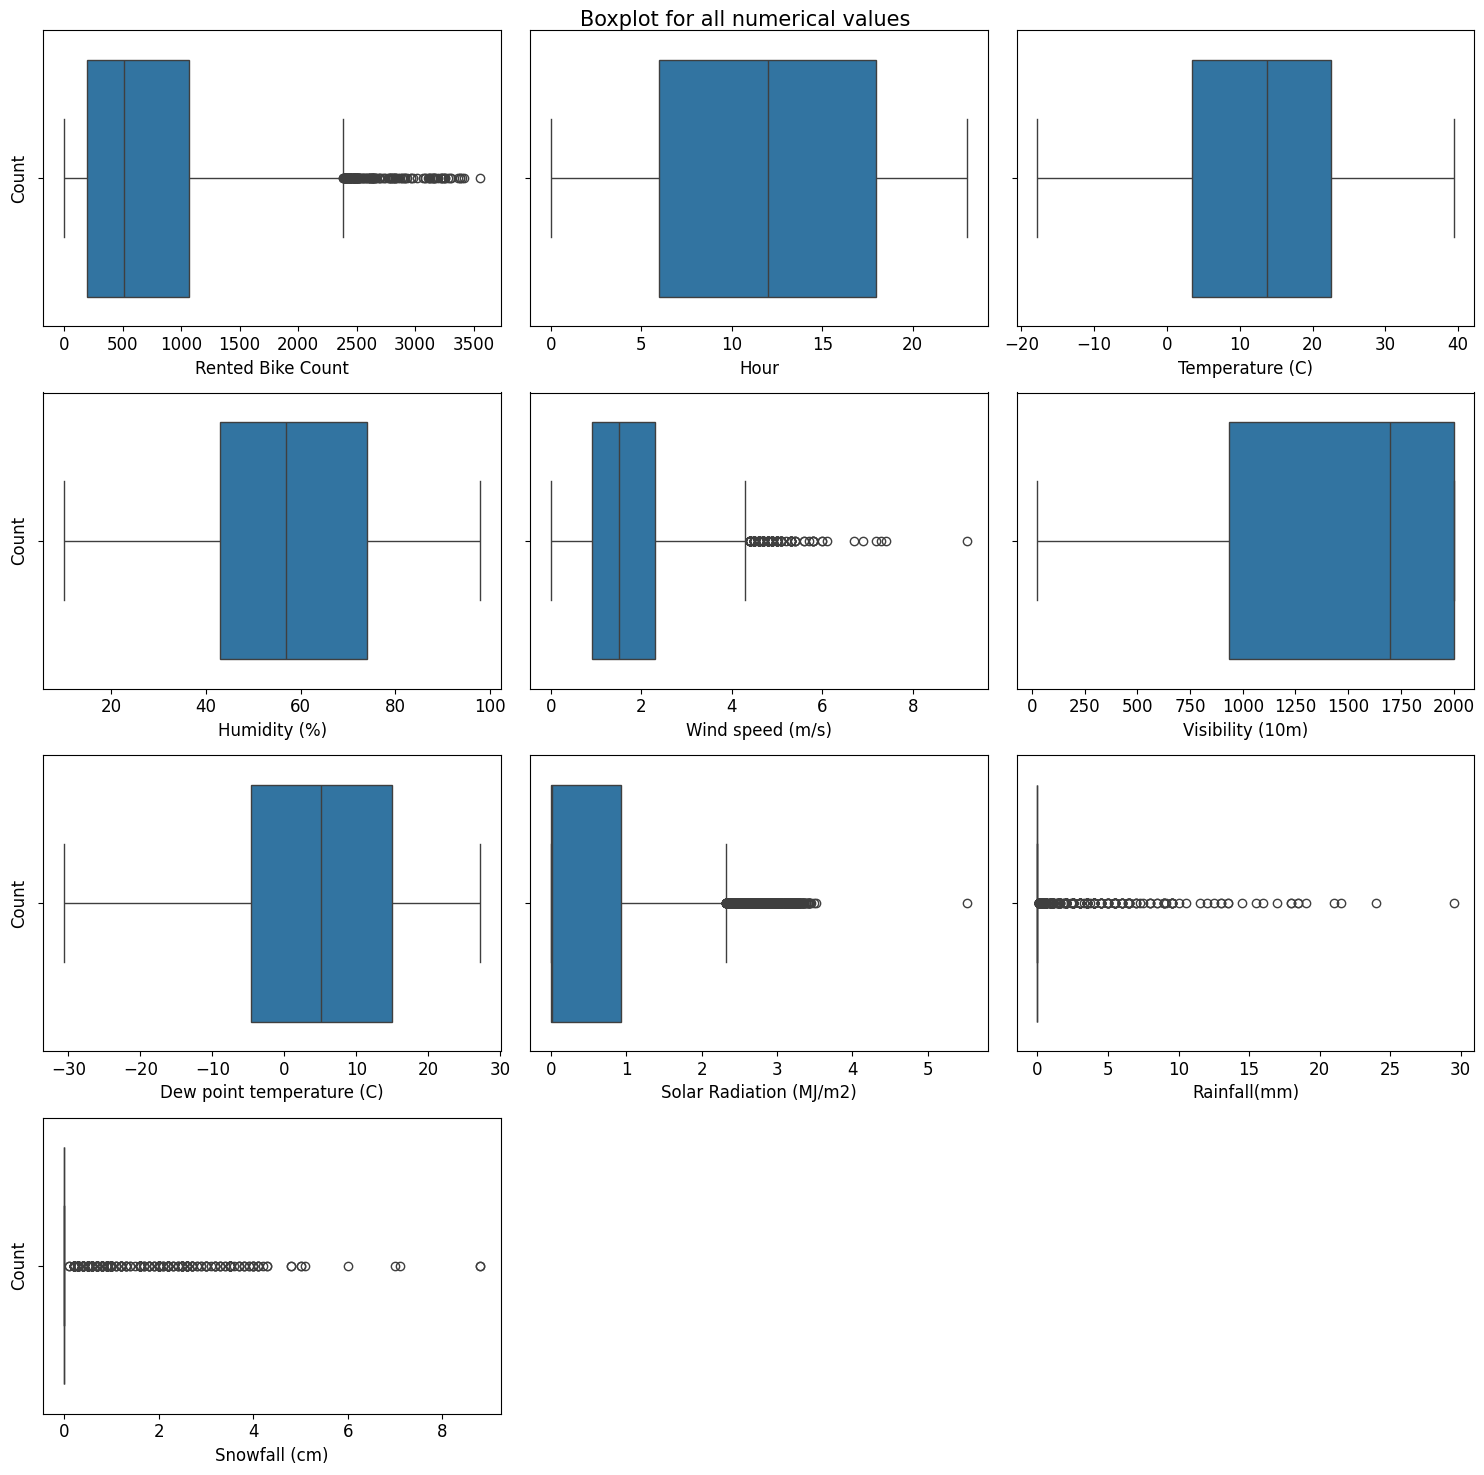

In [5]:
fig, axs= plt.subplots(4,3, figsize=(15, 15))
for_boxplot=['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for i in range(4):
    for j in range(3):
        index = i * 3 + j
        if index < len(for_boxplot):
            sns.boxplot(df_filtered, x=for_boxplot[index], ax=axs[i,j], )
            axs[i,j].set_xlabel(for_boxplot[index], fontsize=12)
            if j==0:
                axs[i,j].set_ylabel('Count', fontsize=12)
        else:
            fig.delaxes(axs[i, j])


fig.suptitle('Boxplot for all numerical values', fontsize=15)
plt.tight_layout()
plt.show()

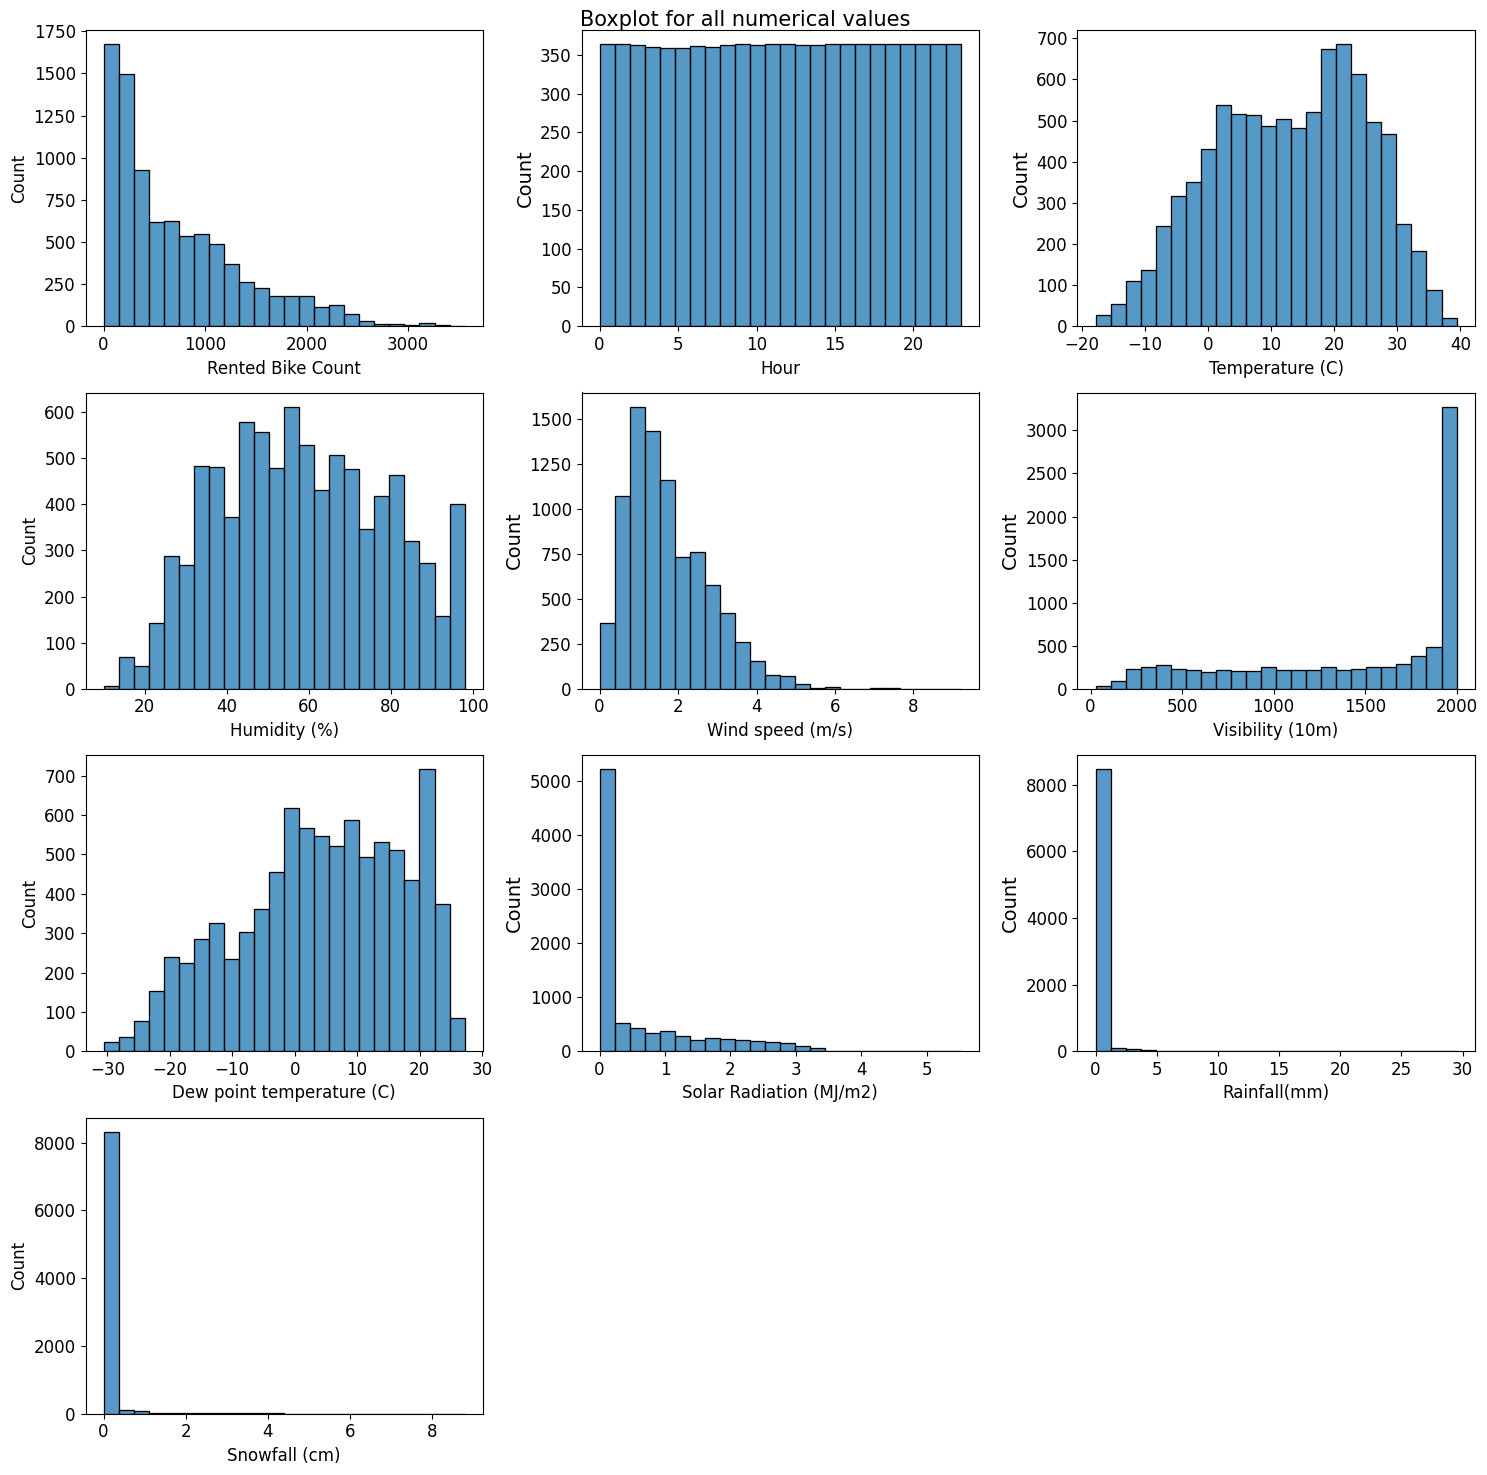

In [6]:
fig, axs= plt.subplots(4,3, figsize=(15, 15))
for_boxplot=['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for i in range(4):
    for j in range(3):
        index = i * 3 + j
        if index < len(for_boxplot):
            sns.histplot(df_filtered, x=for_boxplot[index], ax=axs[i,j], bins=24)
            axs[i,j].set_xlabel(for_boxplot[index], fontsize=12)
            if j==0:
                axs[i,j].set_ylabel('Count', fontsize=12)
        else:
            fig.delaxes(axs[i, j])


fig.suptitle('Boxplot for all numerical values', fontsize=15)
plt.tight_layout()
plt.show()

In [7]:
for i in ['Seasons','Holiday','Functioning Day']:
    print(df[i].value_counts().reset_index())
    print()

  Seasons  count
0  Spring   2208
1  Summer   2208
2  Autumn   2184
3  Winter   2160

      Holiday  count
0  No Holiday   8328
1     Holiday    432

  Functioning Day  count
0             Yes   8465
1              No    295



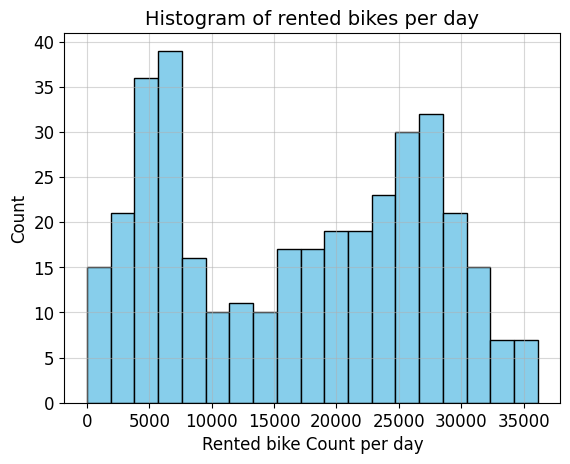

In [8]:
rented=df_filtered.groupby('Date')['Rented Bike Count'].sum().reset_index()
sns.histplot(rented['Rented Bike Count'], bins=19, color='skyblue', edgecolor='black', alpha=1)
plt.title('Histogram of rented bikes per day', fontsize=14)
plt.xlabel('Rented bike Count per day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

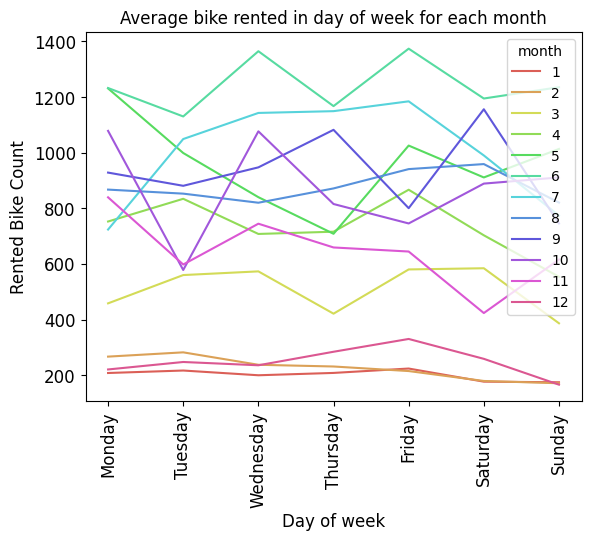

In [9]:
df_date=df.copy(deep=True)
df_date=df_date[df_date['Rented Bike Count']<10000]
df_date['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y")
df_date['day']=df_date.Date.dt.day_of_week
df_date['month']=df_date.Date.dt.month
df_date=df_date.groupby(['day','month'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(df_date, x='day', y='Rented Bike Count', hue='month', 
             palette=sns.color_palette("hls", 12))
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.legend(title='month')
plt.title('Average bike rented in day of week for each month')
day_labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks=np.arange(0, 7), labels=day_labels, rotation=90)
plt.show()

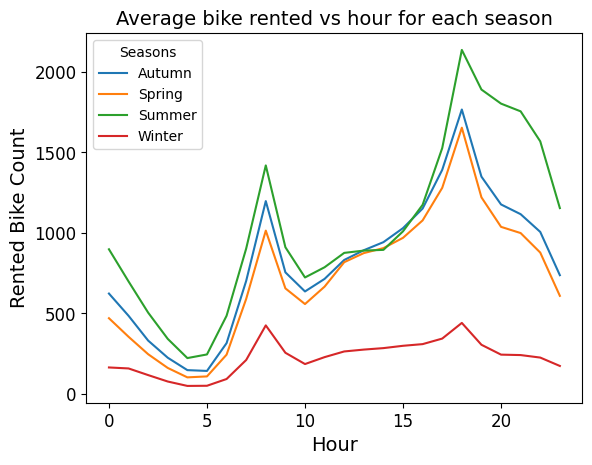

In [10]:
scatter_df=df_filtered.groupby(['Hour','Seasons'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(x=scatter_df['Hour'], y=scatter_df['Rented Bike Count'], 
             hue=scatter_df['Seasons'])
plt.title('Average bike rented vs hour for each season', fontsize=14)
plt.show()

### 1.2 Cleaning the data

In [11]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [12]:
# Filtering funtioning day
df=df[df['Functioning Day']=="Yes"]

# Removing functioning day as all the values are same
df=df.drop(columns=['Functioning Day'])
# Converting seasons to one hot encoding
df=pd.get_dummies(df,columns=['Seasons'])

# Replacing date feature with binary weekday feature
df['Date']=df['Date'].apply(lambda x: date_is_weekday(x))

# Converting holiday to binary
df['Holiday']=df['Holiday'].map(lambda x: 0 if x=="No Holiday" else 1)

# Dealing with outliers

# it is unlikely to rent more than 90000 bicyle in an hour, so removing it
df=df[df['Rented Bike Count']<90000]

# It looks like human error, where they missed the decimal point. Moreover the 
# three error found were from the same date and the nearby temperature was almost
# similar to the the error data after dividing by 10.
df.loc[df['Temperature (C)']>60,'Temperature (C)']=df[df['Temperature (C)']>60
                                                      ]['Temperature (C)']/10 

# Same as the temperature feature, humidity has a error data due to human error. 
df.loc[(df['Humidity (%)']==455),'Humidity (%)']=45.5

# It is very very unlikely for the humidity to be zero or below zero, and there
# are lot of rows were the humidity is below zero. Replacing with NAN values for 
# a value that keeps changing every hour, makes the row inaccurate.
# So removing the rows.
df=df[df['Humidity (%)']>0]


# wind speed cannot be negative, it is an human error and 
# nearby values support that
df.loc[df['Wind speed (m/s)']==-0.7,'Wind speed (m/s)']= 0.7

# Wind speed greater than 90 is too high, that can only happen when there 
# is a hurrican, but nearby values dont support that.
df.loc[(df['Wind speed (m/s)']==91.8), 'Wind speed (m/s)']= np.nan
df.loc[(df['Wind speed (m/s)']==991.1), 'Wind speed (m/s)']= np.nan

# Receving a 35mm rainfall can cause flooding, but the nearby values 
# dont support it
df.loc[(df['Rainfall(mm)']==35), 'Rainfall(mm)']=3.5

# snowfall can not be less than zero
df.loc[df['Snowfall (cm)']==-0.4, 'Snowfall (cm)']=0.4

# Receiving 99 cm of snowfall in summer is highly unlikely
df.loc[(df['Snowfall (cm)']==99), 'Snowfall (cm)']=np.nan

df

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True
1,1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True
2,1,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,0,False,False,False,True
3,1,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,0,False,False,False,True
4,1,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,0,True,False,False,False
8756,1,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,0,True,False,False,False
8757,1,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,0,True,False,False,False
8758,1,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,0,True,False,False,False


In [13]:
df.to_csv('CleanedSeoulBikeData.csv', index=False)

# Further vizualization

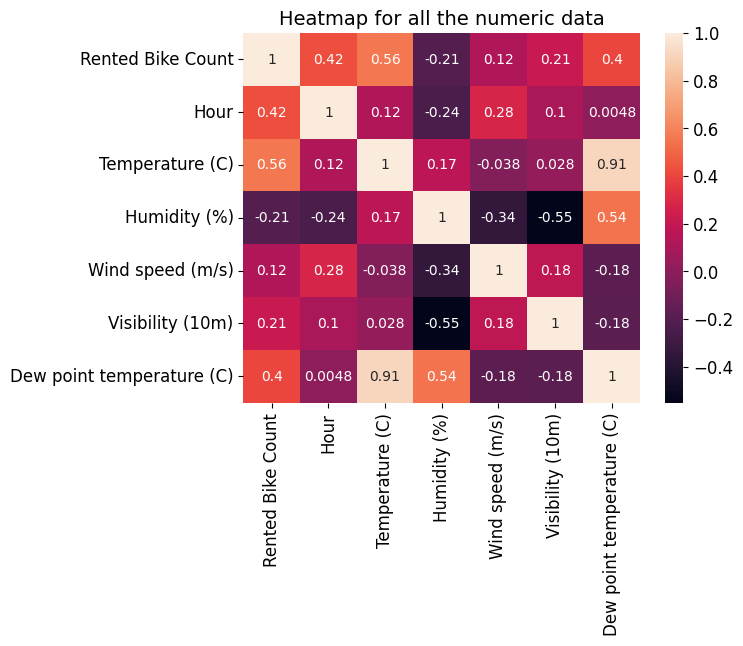

In [14]:
sns.heatmap(df[['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
                'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)'
                ]].corr(), annot=True)
plt.title('Heatmap for all the numeric data', fontsize=14)
plt.show()

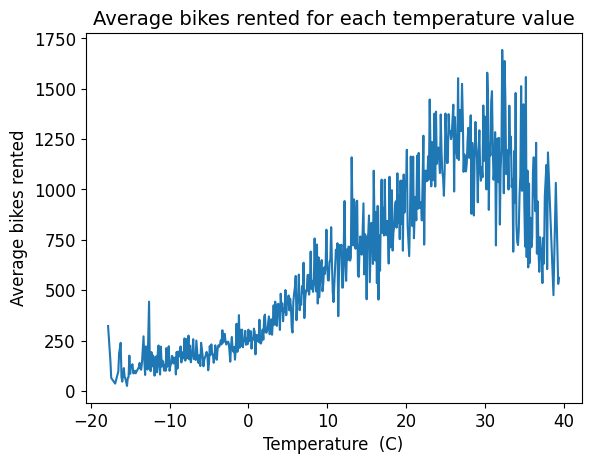

In [15]:
temp=df_filtered.groupby(['Temperature (C)'])['Rented Bike Count'
                                              ].mean().reset_index()
sns.lineplot(x=temp['Temperature (C)'],y=temp['Rented Bike Count'] )
plt.title('Average bikes rented for each temperature value', fontsize=14)
plt.xlabel('Temperature  (C)', fontsize=12)
plt.ylabel('Average bikes rented', fontsize=12)
plt.show()

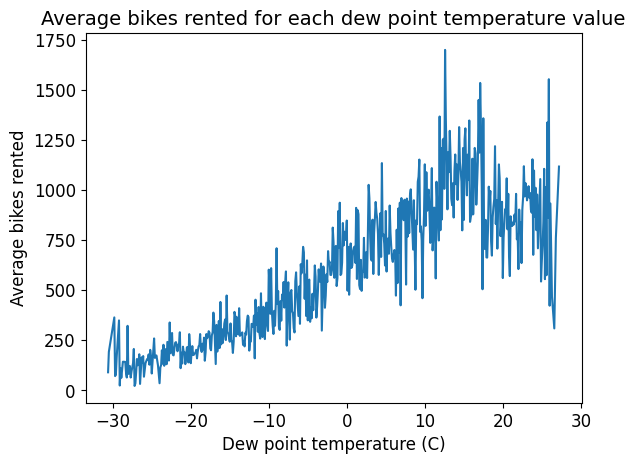

In [16]:
dew_point=df_filtered.groupby(['Dew point temperature (C)'])[
                               'Rented Bike Count'].mean().reset_index()
sns.lineplot(x=dew_point['Dew point temperature (C)'],y=dew_point[
                                'Rented Bike Count'] )
plt.title('Average bikes rented for each dew point temperature value', fontsize=14)
plt.xlabel('Dew point temperature (C)', fontsize=12)
plt.ylabel('Average bikes rented', fontsize=12)
plt.show()

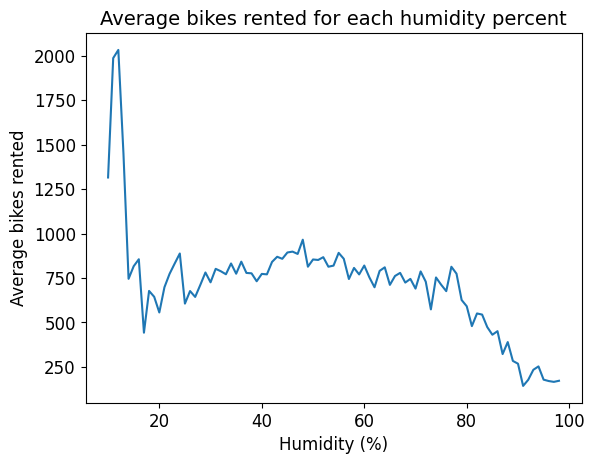

In [17]:
dew_point=df_filtered.groupby(['Humidity (%)'])['Rented Bike Count'
                                                ].mean().reset_index()
sns.lineplot(x=dew_point['Humidity (%)'],y=dew_point['Rented Bike Count'] )
plt.title('Average bikes rented for each humidity percent', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Average bikes rented', fontsize=12)
plt.show()

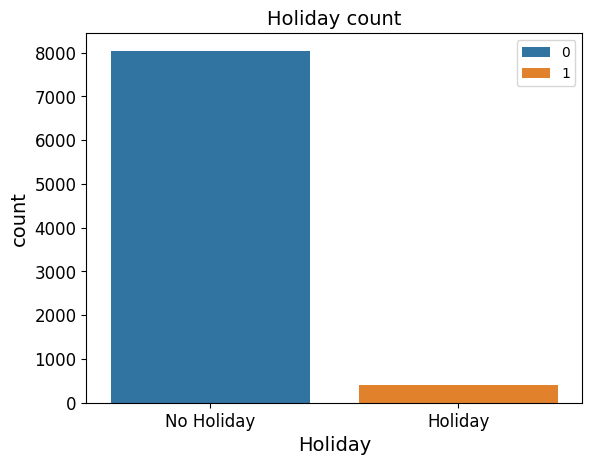

In [18]:
sns.countplot(df, x='Holiday', hue='Holiday',palette='tab10')
plt.title('Holiday count', fontsize=14)
plt.xticks(ticks=[0,1], labels=["No Holiday",'Holiday'])
plt.legend()
plt.show()

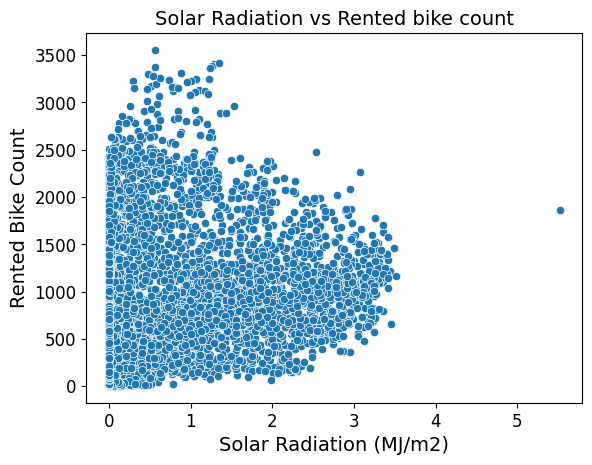

In [19]:
sns.scatterplot(x=df['Solar Radiation (MJ/m2)'], y=df['Rented Bike Count'],
                 alpha=1)
plt.title('Solar Radiation vs Rented bike count', fontsize=14)
plt.show()

## Step 2: Pre-process the data and perform the first fit

### 2.1 Imputation and Pre-Processing

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Your code here
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  
])
df_test=df.copy(deep=True)
df_imputed=pipeline.fit_transform(df)
df_test_imputed=pipeline.fit_transform(df_test)
#df_imputed = pipeline.transform(df)
#df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
#df_imputed

### 2.2 Predicting bike rentals

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[
    'Rented Bike Count']), df['Rented Bike Count'], test_size=0.2,
      random_state=4)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),                
    ('regressor', LinearRegression())      
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')

mean_train_target = np.mean(y_train)
y_pred_baseline=np.full_like(y_test, fill_value=mean_train_target)
rmse_baseline = root_mean_squared_error(y_test, y_pred_baseline)
print(f'RMSE Baseline: {rmse_baseline:.2f}')

RMSE: 422.04
RMSE Baseline: 625.47


## Step 3: Hyper-parameter optimisation

### Linear regression

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error, make_scorer
from sklearn.preprocessing import PowerTransformer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(standardize=False)),
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])


# Cross-validation
kf = KFold(n_splits=10, shuffle=True)
rmse_scorer = make_scorer(root_mean_squared_error)

lr_rmse = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=rmse_scorer)
lr_rmse_mean = np.mean(lr_rmse)
lr_rmse_std = np.std(lr_rmse)
print("Linear Regression")
print(f'RMSE Mean: {lr_rmse_mean:.2f}')
print(f'RMSE Standard Deviation: {lr_rmse_std:.2f}')

print()
print("After hyperparameter tuning:")
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
}

lr_grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                              scoring='neg_root_mean_squared_error', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

lr_rmse = cross_val_score(lr_grid_search.best_estimator_, X_train, y_train, cv=kf, 
                          scoring=rmse_scorer)
lr_rmse_mean = np.mean(lr_rmse)
lr_rmse_std = np.std(lr_rmse)
print(f'RMSE Mean: {lr_rmse_mean:.2f}')
print(f'RMSE Standard Deviation: {lr_rmse_std:.2f}')


Linear Regression
RMSE Mean: 431.61
RMSE Standard Deviation: 11.55

After hyperparameter tuning:
RMSE Mean: 431.78
RMSE Standard Deviation: 15.81


In [25]:
str(lr_grid_search.best_estimator_)

"Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),\n                ('transformer', PowerTransformer(standardize=False)),\n                ('scaler', MinMaxScaler()), ('regressor', LinearRegression())])"

### Support Vectar Regression

In [187]:
from sklearn.svm import SVR

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(standardize=False)),
    ('scaler', RobustScaler()),                
    ('regressor', SVR())                         
])

# Cross-validation
kf = KFold(n_splits=10, shuffle=True)
rmse_scorer = make_scorer(root_mean_squared_error)

rmse = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring=rmse_scorer)
rmse_mean = np.mean(rmse)
rmse_std = np.std(rmse)
print("Support Vectar Regression")
print(f'RMSE Mean: {rmse_mean:.2f}')
print(f'RMSE Standard Deviation: {rmse_std:.2f}')

print()
print("After hyperparameter tuning:")

param_grid = {
    'regressor__C': [0.1, 1, 10, 100],
    'regressor__kernel': ['linear', 'poly', 'rbf'],
    'regressor__gamma': ['scale', 'auto'],
    'regressor__epsilon': [0.1, 0.2, 0.5, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, 
                       scoring=rmse_scorer)
rmse_mean = np.mean(rmse)
rmse_std = np.std(rmse)
print(f'RMSE Mean: {rmse_mean:.2f}')
print(f'RMSE Standard Deviation: {rmse_std:.2f}')

Support Vectar Regression
RMSE Mean: 519.83
RMSE Standard Deviation: 12.28

After hyperparameter tuning:
RMSE Mean: 318.93
RMSE Standard Deviation: 12.18


### Choosing the best model

In [188]:
y_pred = lr_grid_search.predict(X_test)
# Calculate RMSE
lr_rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE for linear regression: {lr_rmse:.2f}')

y_pred = grid_search.predict(X_test)
# Calculate RMSE
svr_rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE for SVR: {svr_rmse:.2f}')
print()
print('Difference between training RMSE and testing RMSE')

print(f'linear regression: {abs(lr_rmse_mean-lr_rmse):.2f}')

print(f'SVR: {abs(rmse_mean-svr_rmse):.2f}')

RMSE for linear regression: 416.13
RMSE for SVR: 327.65

Difference between training RMSE and testing RMSE
linear regression: 15.41
SVR: 8.71


SVR has the lowest RSME and lesses difference between training rsme and testing rsme. So it is the best model.

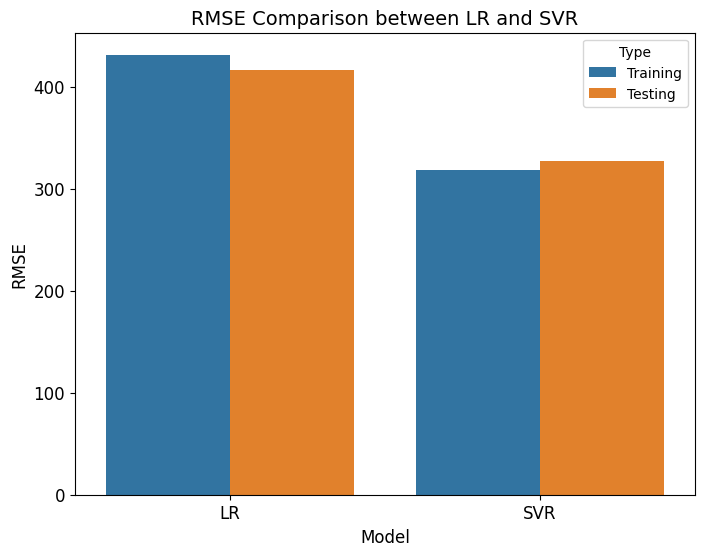

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

  
# Create a dataframe for plotting
data = {
    'Model': ['LR', 'SVR', 'LR', 'SVR'],
    'RMSE': [lr_rmse_mean, rmse_mean, lr_rmse, svr_rmse],
    'Type': ['Training', 'Training', 'Testing', 'Testing']
}
plot = pd.DataFrame(data)

# Set up the matplotlib figure and axes
plt.figure(figsize=(8, 6))

# Use Seaborn to create the bar plot
sns.barplot(x='Model', y='RMSE', hue='Type', data=plot, palette='tab10', alpha =1)

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE Comparison between LR and SVR', fontsize=14)

# Show the plot
plt.legend(title='Type')
plt.show()


## Step 4: Further improvements

I experimented with various scaling methods in the code provided by ChatGPT to identify the one that best suits the data. Additionally, I incorporated transformers to linearize the data further, resulting in a reduction in RMSE.

Further, each column can be scaled individually using specific methods, and employing a more effective transformation can enhance the model further. Instead of replacing missing values with the median of the entire dataset, it would be more meaningful to calculate and fill in the median value for each day, given that weather data tends to remain relatively consistent within the same day. Linear regression is limited to identifying linear relationships within the data. Therefore, alternative regression methods, such as polynomial regression, logistic regression or decision tree regression, can be utilized. Instead of using a fixed 10-fold cross-validation, using techniques like TimeSeriesSplit or GroupKFold when dealing with time-series data can improve the model. In addition to RMSE, evaluating models using other metrics such as Mean Absolute Error (MAE), R-squared (R2 score), or adjusted R2 score. These metrics provide different perspectives on model performance and can help in better understanding how well the model generalizes. Instead of choosing a single model, using ensemble methods like Bagging (e.g., RandomForestRegressor) or Boosting (e.g., GradientBoostingRegressor). These methods often improve predictive performance by aggregating multiple models together.

